## Online Payments Fraud Detection Dataset Case Study

Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK.

#### Problem
 - Blossom Bank wants to build a Machine Learning model to predict online payment fraud.

The interpretation of the columns:
- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [2]:
df = data = pd.read_csv('Online _Payment _Fraud _Detection.csv',encoding='unicode-escape')


In [3]:
# Display the first five rows in the data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
# Display more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [6]:
# Statistical information about the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [7]:
# Missing Values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

<AxesSubplot:>

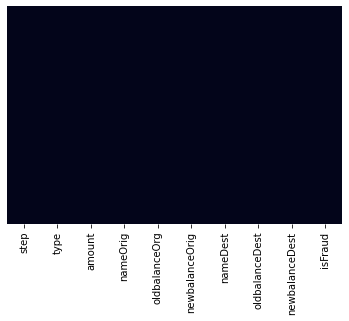

In [8]:
# Visualizing missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

## Exploratory Data Analysis

<AxesSubplot:xlabel='type', ylabel='count'>

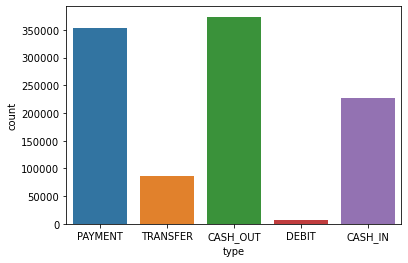

In [9]:
# What type of transation was used the most?
sns.countplot(x='type',data=df)

### THIS TO CHECK THE ACCOUNTS THAT HAVE THE HIGHEST RATE OF TRANSACTION 
### WE WILL LATER CHECK IF THE FREQUENT DESC ACCOUNTS ARE CORRELATING WITH FRAUD 


In [10]:
df.nameDest.value_counts()

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: nameDest, Length: 449635, dtype: int64

In [11]:
## This is neglible because the higest frequncy from a particular source is 2
df.nameOrig.value_counts()

C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: nameOrig, Length: 1048317, dtype: int64

<AxesSubplot:xlabel='type', ylabel='amount'>

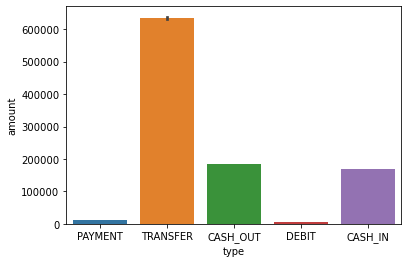

In [12]:
# What type of transation had the most amount in value?
sns.barplot(x='type',y='amount',data=df)

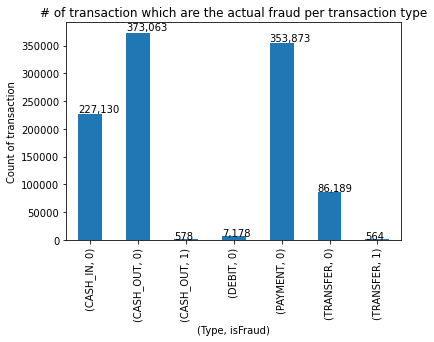

In [13]:

fr = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
fr.set_title("# of transaction which are the actual fraud per transaction type")
fr.set_xlabel("(Type, isFraud)")
fr.set_ylabel("Count of transaction")
for p in fr.patches:
    fr.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

## We can infer from above  bar above that fraud is mostly perpertrated  in cash out and transfer transactions

<AxesSubplot:xlabel='type', ylabel='amount'>

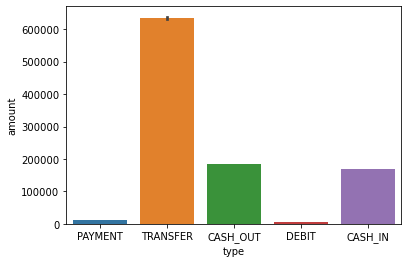

In [14]:
# What type of transation had the most amount in value?
sns.barplot(x='type',y='amount',data=df)

Cash out and Payment are the most common type of transactions but Transfer type has the maximum amount of money being transfered to the recipient.

<AxesSubplot:xlabel='isFraud', ylabel='count'>

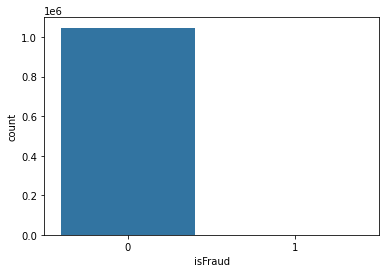

In [15]:
# The above graph indicates that the dataset is highly unbalanced.
sns.countplot(x='isFraud',data=df)

In [16]:
df.step.value_counts()

19    51352
18    49579
43    45060
15    44609
17    43361
      ...  
67        6
54        4
76        4
28        4
29        4
Name: step, Length: 95, dtype: int64

<AxesSubplot:xlabel='step', ylabel='Count'>

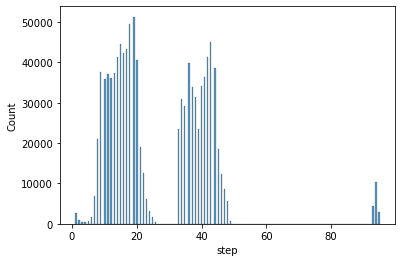

In [17]:
# There is no normal distribution of the step(hours ) per transaction
sns.histplot(data=df,x='step')

<AxesSubplot:xlabel='step'>

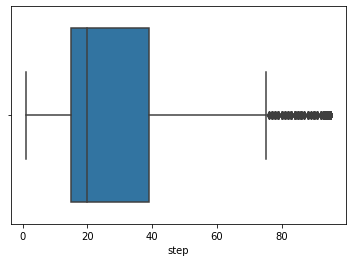

In [18]:
# The boxplot shows that we have outliers present in the step column
sns.boxplot(data=df,x='step')

<AxesSubplot:xlabel='amount', ylabel='Count'>

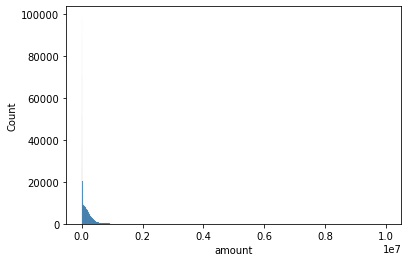

In [19]:

# The distribution of the amount feature is not symmentrical
sns.histplot(data=df,x='amount')

<AxesSubplot:xlabel='amount'>

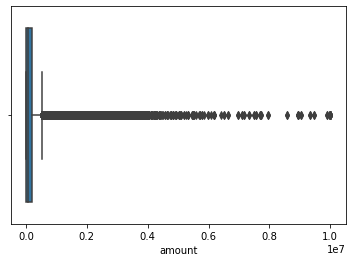

In [20]:
# The amount column has a lot outliers
sns.boxplot(data=df,x='amount')

C:\Users\IDOWU O K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

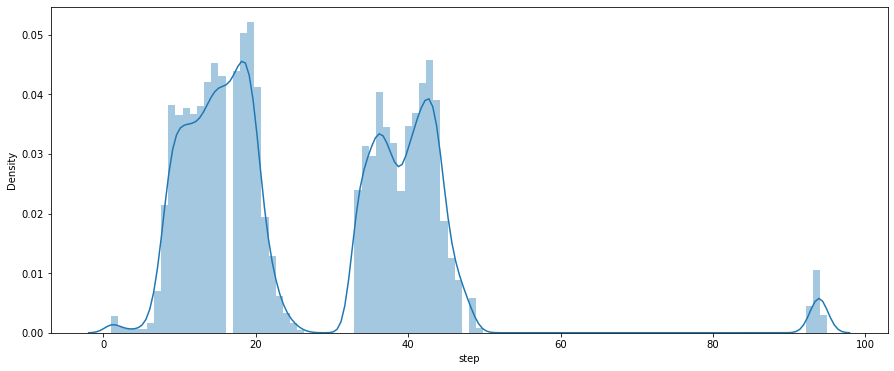

In [21]:
# Distribution of the Step column
plt.figure(figsize=(15,6))
sns.distplot(df['step'],bins=100)

C:\Users\IDOWU O K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

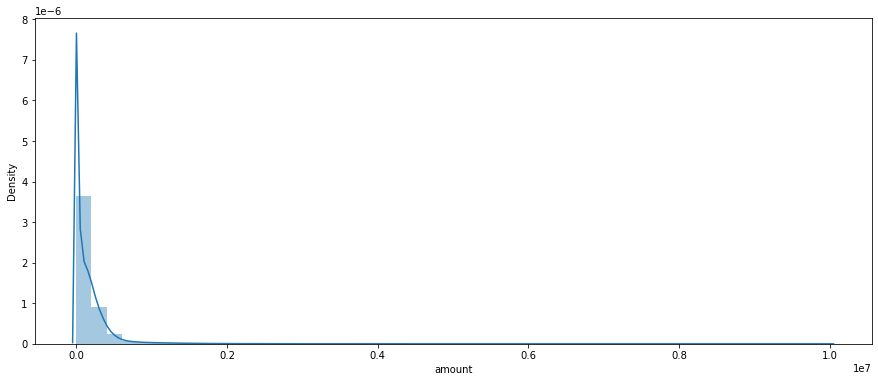

In [22]:
# Distribution of the amount column
plt.figure(figsize=(15,6))
sns.distplot(df['amount'])

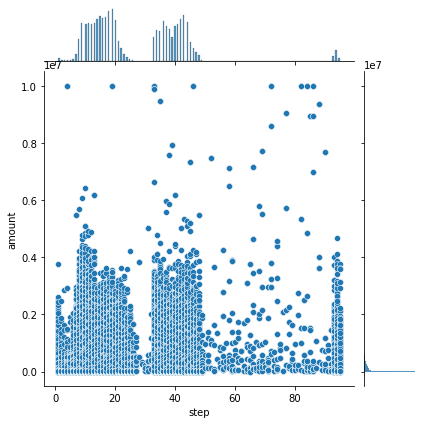

In [23]:
# A joint plot investigating the relationship between Step and Amount
sns.jointplot(x='step',y='amount',data=df)

<AxesSubplot:>

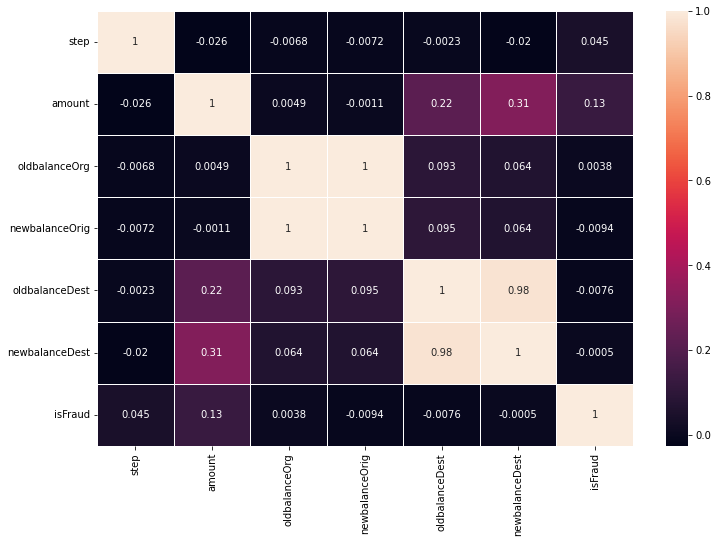

In [24]:
# Using the heatmap to showcase the relationship between each columns
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(),annot=True,linewidths=.5)

### From the above heatmap there is strong  correlation betwwen oldbalancedest and newBalanceDest, 

### The lack of correlation between fraud and other features in the data is connected to the lack of balance in the dataset


In [25]:
df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64



Resampling the dataset

- Essentially this is a method that will process the data to have an approximate 50-50 ratio.
- One way to achieve this is by OVER-sampling, which is adding copies of the under-represented class (better when you have little data)
- Another is UNDER-sampling, which deletes instances from the over-represented class (better when he have lot's of data)

In [26]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [27]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


## Sub-Sample
This will create a dataframe with a ratio of 50/50 ratio of fraud and non-fraud transactions This is done to avoid -OVERFITTING and WRONG CORRELATIONS

In [28]:
from sklearn.preprocessing import StandardScaler, RobustScaler

#Standardization: scales features such that the distribution is centered around 0, with a standard deviation of 1.
#Normalization: shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).
#Robust Scaler: similar to normalization but it instead uses the interquartile range, so that it is robust to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# create a new column for scaled columns
df["Scaled_step"] = rob_scaler.fit_transform(df["step"].values.reshape(-1,1))
df["Scaled_amount"] = rob_scaler.fit_transform(df["amount"].values.reshape(-1,1))
df["Scaled_oldbalanceOrg"] = rob_scaler.fit_transform(df["oldbalanceOrg"].values.reshape(-1,1))
df["Scaled_newbalanceOrig"] = rob_scaler.fit_transform(df["newbalanceOrig"].values.reshape(-1,1))
df["Scaled_oldbalanceDest"] = rob_scaler.fit_transform(df["oldbalanceDest"].values.reshape(-1,1))
df["Scaled_newbalanceDest"] = rob_scaler.fit_transform(df["newbalanceDest"].values.reshape(-1,1))

df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Scaled_step,Scaled_amount,Scaled_oldbalanceOrg,Scaled_newbalanceOrig,Scaled_oldbalanceDest,Scaled_newbalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,-0.791667,-0.329858,1.128013,0.918078,-0.137978,-0.189823
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,-0.791667,-0.369416,0.038400,0.111024,-0.137978,-0.189823
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,-0.791667,-0.377765,-0.115784,0.000000,-0.137978,-0.189823
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,-0.791667,-0.377765,-0.115784,0.000000,-0.114852,-0.189823
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,-0.791667,-0.320789,0.187000,0.171168,-0.137978,-0.189823


In [29]:
df.drop(["step","type","amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"], axis=1, inplace=True)

df.head()

,isFraud,Scaled_step,Scaled_amount,Scaled_oldbalanceOrg,Scaled_newbalanceOrig,Scaled_oldbalanceDest,Scaled_newbalanceDest
0,0,-0.791667,-0.329858,1.128013,0.918078,-0.137978,-0.189823
1,0,-0.791667,-0.369416,0.038400,0.111024,-0.137978,-0.189823
2,1,-0.791667,-0.377765,-0.115784,0.000000,-0.137978,-0.189823
3,1,-0.791667,-0.377765,-0.115784,0.000000,-0.114852,-0.189823
4,0,-0.791667,-0.320789,0.187000,0.171168,-0.137978,-0.189823


In [30]:
#Splitting the Data - (Original Dataframe)
#I am going to perform Random Undersampling and Oversampling to test the models on the original dataset and noy the testing set creating during sampling

data = df.copy()

print(round(df["isFraud"].value_counts()[0]/len(df) * 100,2), "% of the data are not fraudulent transactions")
print(round(df["isFraud"].value_counts()[1]/len(df) * 100,2), "% of the data are fraudulent")

#drop the label
y = df["isFraud"]
x = df.drop("isFraud", axis=1)

sample = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sample.split(x, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = x.iloc[train_index], x.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

99.89 % of the data are not fraudulent transactions
0.11 % of the data are fraudulent
Train: [ 209639  209640  209641 ... 1048572 1048573 1048574] Test: [     0      1      2 ... 480463 480464 481250]
Train: [      0       1       2 ... 1048572 1048573 1048574] Test: [209639 209640 209641 ... 777627 782395 782396]
Train: [      0       1       2 ... 1048572 1048573 1048574] Test: [ 419187  419188  419189 ... 1030354 1030355 1030356]
Train: [      0       1       2 ... 1048572 1048573 1048574] Test: [ 628844  628845  628846 ... 1030583 1030584 1030585]
Train: [      0       1       2 ... 1030583 1030584 1030585] Test: [ 838419  838420  838421 ... 1048572 1048573 1048574]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99891162 0.00108838]
[0.99890804 0.00109196]


In [31]:
#Random Under-Sampling
#This basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

print("Non-Fraud transactions = ", df["isFraud"].value_counts()[0])
print("Fraud transactions = ", df["isFraud"].value_counts()[1])
print("----------------------------------------")

df = df.sample(frac=1)

#Amount of fraud classes 492 rows.
fraud_df = df.loc[df['isFraud'] == 1]
non_fraud_df = df.loc[df['isFraud'] == 0][:1142]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

print("Result from random undersampling")
print("Non-Fraud transactions = ", new_df["isFraud"].value_counts()[0])
print("Fraud transactions = ", new_df["isFraud"].value_counts()[1])

Non-Fraud transactions =  1047433
Fraud transactions =  1142
----------------------------------------
Result from random undersampling
Non-Fraud transactions =  1142
Fraud transactions =  1142


In [32]:
new_df.head()

,isFraud,Scaled_step,Scaled_amount,Scaled_oldbalanceOrg,Scaled_newbalanceOrig,Scaled_oldbalanceDest,Scaled_newbalanceDest
1030461,1,1.916667,10.020648,15.226886,0.000000,-0.137978,-0.189823
446705,0,-0.041667,0.061645,-0.117109,0.000000,0.340695,0.268688
489681,0,-0.041667,-0.375572,0.270993,0.300159,-0.137978,-0.189823
337782,0,-0.166667,0.420601,-0.005320,1.010406,0.193864,-0.065628
196776,1,-0.291667,19.573776,29.322353,0.000000,-0.050485,3.338760


In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 1030461 to 288377
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   isFraud                2284 non-null   int64  
 1   Scaled_step            2284 non-null   float64
 2   Scaled_amount          2284 non-null   float64
 3   Scaled_oldbalanceOrg   2284 non-null   float64
 4   Scaled_newbalanceOrig  2284 non-null   float64
 5   Scaled_oldbalanceDest  2284 non-null   float64
 6   Scaled_newbalanceDest  2284 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 142.8 KB


C:\Users\IDOWU O K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


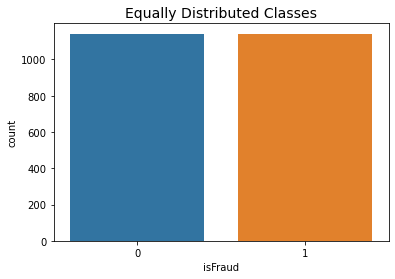

In [34]:
sns.countplot('isFraud', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [35]:
#Model Application
#Simple and efficient tools for predictive data analysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [37]:
#8 Machine learning  Algorithms will be applied to the dataset
classifiers = [ 
               [RandomForestClassifier(),'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'], 
               [SGDClassifier(),'SGD Classifier'], 
               [SVC(),'SVC'],
               [GaussianNB(), "Naive Bayes"], 
               [DecisionTreeClassifier(random_state = 42), "Decison tree"],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [38]:
df_1 = new_df.drop("isFraud", axis=1)
label = new_df["isFraud"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(new_df, label, test_size=0.2)

score_list = {}
cross_val_list = {}
roc_auc_list = {}
accuracy_score_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)

    score = model.score(X_test, y_test)
    cross_val = cross_val_score(model, X_test, y_test).mean()
    roc_auc = roc_auc_score(y_test, pred)
    acuracy = accuracy_score(y_test, pred)
    
    score_list[model_name] = ([str(round(score*100, 2)) + '%'])
    cross_val_list[model_name] = ([str(round(cross_val*100, 2)) + '%'])
    roc_auc_list[model_name] = ([str(round(roc_auc*100, 2)) + '%'])
    accuracy_score_list[model_name] = ([str(round(acuracy*100, 2)) + '%'])
   
    if model_name != classifiers[-1][1]:
       print('')

In [40]:
print("Accuracy Score")
sl = pd.DataFrame(score_list)
sl.head()

Accuracy Score


,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,100.0%,98.03%,100.0%,99.78%,100.0%,100.0%,99.78%


In [41]:
print("Cross Validation")
sl = pd.DataFrame(cross_val_list)
sl.head()

Cross Validation


,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,100.0%,94.97%,98.03%,82.05%,100.0%,100.0%,100.0%


In [42]:
print("roc_auc_list")
sl = pd.DataFrame(roc_auc_list)
sl.head()

roc_auc_list


,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,100.0%,98.05%,100.0%,99.78%,100.0%,100.0%,99.78%


 ### Accuracy score  examines how well how trained dataset is able to predict true positives and true negatives, it is important  for our model to be able to spot fraud 100 percent of the time 
 
 ### cross validation across the 4 models is 100% , which proves that our model is not overfitted or under fitted accross the data set 
 
 
 ### The ROC AUC score  helps us to compare ground truth to predicted probabilities , some the model examine gave us 100 percent when examine , personally siince we have model that have done a 100 percent across the three validation techniques , i will go for any of the four model
 
 ### Based on the nature of th institution , i will suggest that model should be more concerned with limiting false negatives that is fraud that go undetected , rather than false positives 
  
 
 